In [128]:
# Data Science with Python
# Application of data science
#Steps

#steps1: Import necessary libraries
import pandas as pd # data processing
import seaborn as sn #statist graph package
import matplotlib.pyplot as plt #plot package

In [129]:
df = pd.read_csv('crop.csv')

# Display the first few rows of the dataset
df.head()
df.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
551,22,42,22,25.542491,56.966408,7.887659,48.467970,mothbeans
1224,15,125,199,18.426994,80.556259,5.569230,69.757343,grapes
1294,11,124,204,13.429886,80.066340,6.361141,71.400430,grapes
1051,116,81,55,26.423133,83.699504,5.915546,95.123221,banana
218,25,78,76,17.480426,15.755940,7.228963,66.969806,chickpea


In [130]:
#check for missing values again
print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [131]:
# Explanatory data analysis (EDA)
# Summary statistics
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [132]:
# Data Preprocessing
# for machine learning module


**CORRELATION**

    From a business perspective, correlation analysis helps you to answer questions like:

    What is the relationship between 2 features?
        Are they dependent or independent?
        Do they increase and decrease together (positive correlation)?
        Does one of them increase when the other decrease and vice versa (negative correlation)?
        Or are they not correlated?


In [133]:
correlated_df = df.drop(columns=['label'])

correlated_df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


**Now let's visualize the correlation table above using a heatmap**
 -Pearson correlation type- Default and most used find a linear relationship between normally distributed variables.
 -Kendall and Spearman rank correlation for variables are not normally distributed or the relationship between the variables is not linear, 



<Axes: >

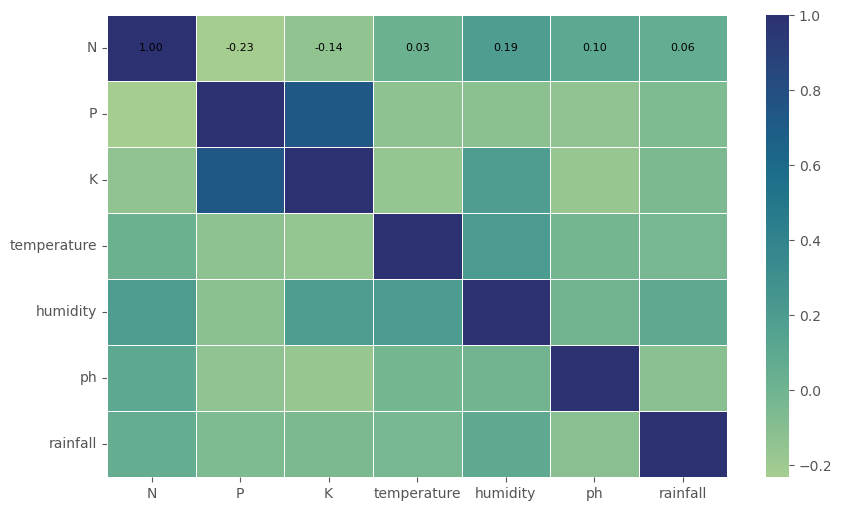

In [134]:
#Optional but useful
plt.style.use('bmh') #setting up 'bmh' as "Bayesian Methods for Hackers" style sheet
plt.style.use('ggplot') #R ggplot stype

fig, ax = plt.subplots(figsize=(10,6))


# 1 . Pearson correlation type
sn.heatmap(
    correlated_df.corr(), 
    annot=True, 
    fmt=".2f",
    linewidths=.5,
    # cmap=sn.cubehelix_palette(as_cmap=True), #Export color map as an object
    cmap="crest",
    ax=ax, 
    annot_kws={"size": 8,"color":"black"})

In [135]:
# 2. Kendall
correlated_df.corr(method ='kendall')


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.126438,0.134273,0.018003,0.043503,0.089981,0.010675
P,-0.126438,1.000000,0.112858,-0.093892,-0.209444,-0.069890,-0.018331
K,0.134273,0.112858,1.000000,-0.055338,0.190514,-0.106470,0.054646
temperature,0.018003,-0.093892,-0.055338,1.000000,0.078116,0.020666,-0.089448
humidity,0.043503,-0.209444,0.190514,0.078116,1.000000,-0.013975,0.062094
ph,0.089981,-0.069890,-0.106470,0.020666,-0.013975,1.000000,-0.096859
rainfall,0.010675,-0.018331,0.054646,-0.089448,0.062094,-0.096859,1.000000


<Axes: >

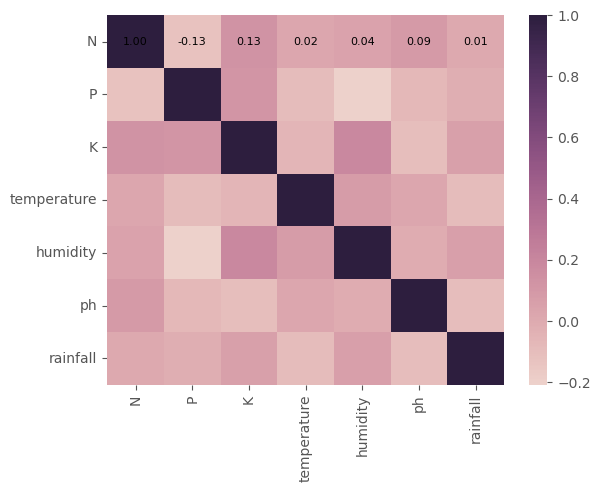

In [136]:

sn.heatmap(
    correlated_df.corr(method="kendall"), 
    cmap=sn.cubehelix_palette(as_cmap=True),
    annot=True, 
    fmt=".2f",
    annot_kws={"size": 8,"color":"black"},
    )

In [137]:
# 3. Spearman
correlated_df.corr(method ='spearman')


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.162625,0.208248,0.022390,0.061113,0.141879,0.011411
P,-0.162625,1.000000,0.195161,-0.137618,-0.309246,-0.119063,-0.032457
K,0.208248,0.195161,1.000000,-0.081082,0.279493,-0.155351,0.069903
temperature,0.022390,-0.137618,-0.081082,1.000000,0.124172,0.027754,-0.152028
humidity,0.061113,-0.309246,0.279493,0.124172,1.000000,-0.007281,0.100731
ph,0.141879,-0.119063,-0.155351,0.027754,-0.007281,1.000000,-0.151280
rainfall,0.011411,-0.032457,0.069903,-0.152028,0.100731,-0.151280,1.000000


<Axes: >

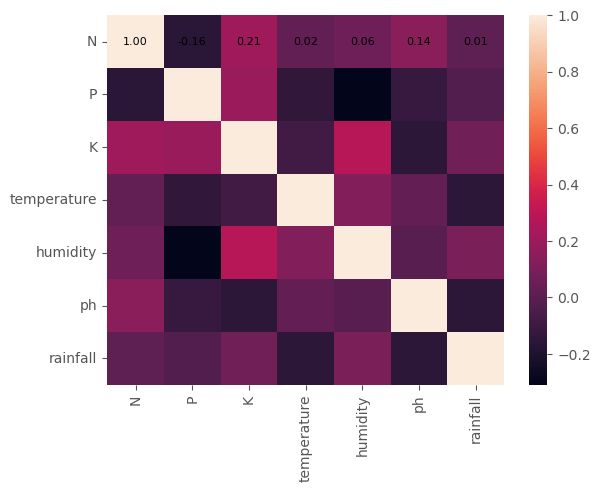

In [138]:

sn.heatmap(
    correlated_df.corr(method="spearman"), 
    # cmap=sn.cubehelix_palette(as_cmap=True),
    annot=True, 
    fmt=".2f",
    annot_kws={"size": 8,"color":"black"},
    )

**Machine Learning**
1. modules, 
2. set train and 
3. test the data


Splitting the data into training and testing sets.

    (dependent) y -variable that the model will try to predict.
    (Independent) x -features that will be used to train the model.


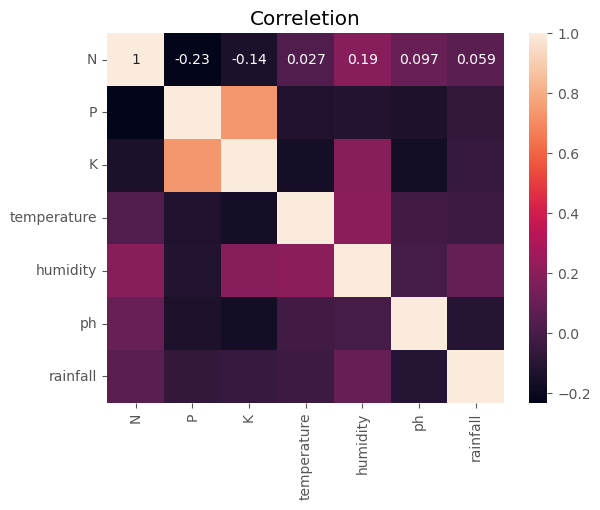

In [139]:

c = df.label.astype('category')
target_categories = dict(enumerate(c.cat.categories))
df['target_categories'] = c.cat.codes

# Separate features and target variable
y = df.target_categories
x = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]


sn.heatmap(x.corr(), annot=True)
plt.title("Correletion")
plt.show()

**Trainining**
* a) Extract the independent variables
* b) Extract the dependent variables too.
* c) Identifying and handling the missing values
    * Deleting a particular row  
    * Calculating the mean 
* d) Encoding the categorical data (since we are dealing with numbers only we need to encode this data to numbers)
    * W can use LabelEncoder() class from the sci-kit learn library

In [140]:
from sklearn.preprocessing import LabelEncoder

label_encoder_x = LabelEncoder()

df['label'] = label_encoder_x.fit_transform(df['label'])
df['label'] 

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int64

* e) Handling outliers :Outliers are data points that significantly deviate from the rest of the dataset
*       -Identified using various methods eg Z-Score and IQR (Interquartile Range)
* f) Dealing with Imbalanced Datasets:
        * Resampling the minority(create duplicates) etc
        

        
* g) Splitting the dataset
*       <---------------Data set --------->
*       ----------------------------------
        |                        |        |
        |       Training Set     |Test Set|
        | (y and x train -70%)   |  (30%) |
        -----------------------------------
        
        from sklearn.model_selection import train_test_split  
        x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  



In [141]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

x_train

,N,P,K,temperature,humidity,ph,rainfall
1567,27,120,200,21.452787,90.745319,6.110219,116.703658
2031,81,36,38,23.765547,87.983299,6.334838,150.316615
2073,90,59,35,24.251335,89.864541,7.098228,175.174211
1374,81,16,45,26.904357,86.254262,6.727468,59.759800
279,47,80,77,17.182484,16.428918,7.561108,72.850173
...,...,...,...,...,...,...,...
1033,102,71,48,28.654563,79.286937,5.695268,102.463378
1731,34,68,51,27.347349,94.177567,6.687088,40.351531
763,35,64,15,28.474423,63.536045,6.500145,69.527441
835,39,65,23,25.434598,69.126134,7.685959,41.026829


**Feature Scaling**
* Also known as normalization with goal of allowing columns in d-set to use a common scale without distorting difference in the range of values.
* Scaling creates new values that maintain a distribution while keeping values within scale applied to all numeric colums i.e to bring the numerical values to a uniform scale. We can scale in two ways normalization or normalization( most common) 

* 2 Types commonly used:
    * Z-Score - Where all values are converted to Z-score 
    * MIn Max - is a form of normalization that scales the values between 0 and 1. It gets its name because the maximum and minimum values of the feature are used for normalization.
    This improves the performance and training stability of machine learning algorithms. 
    *                   X-Xmin
             Xscaled = --------------
                        Xmax-Xmin


    * Most times in the machine learning workflow, the target variables (y_train and y_test) are not transformed or scaled using techniques like MinMaxScaler. The target variables usually represent the outcomes or labels that your model is trying to predict, and scaling them is not always necessary or appropriate.

In [142]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # We can pass the range too i.e scaler = MinMaxScaler(feature_range=(0,3))
#  Scaling the traing and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


**Models Selection from SciKit-Learn**
1. Classification -Identifying which category an object belongs to.
* Applications
    *  Spam detection, 
    * image recognition
    
* Algorithms
    * nearest neighbors, 
    * random forest, 
    * logistic regression,    etc



In [143]:
# Selection of model, KNN, Confusion Matrix, Random forest, Use classification like SVM, decision tree
#Predict using KNN
from sklearn.neighbors import KNeighborsClassifier

In [153]:
#  1. Logistic Regression
from sklearn.linear_model import LinearRegression

logreg = LinearRegression()
logreg.fit(x_train_scaled,y_train)
y_pred_logreg = logreg.predict(x_test_scaled)
print(y_pred_logreg)

    # mean accuraccy score
score = logreg.score(x_test_scaled,y_test)
print("Mean Accuraccy Score: ",score)

[13.21697493 13.78637883  4.82390558  4.85310019  9.54375903 10.49611089
 12.30022559  8.70518309 12.95371695  7.58026267  9.24089213 11.47689474
  9.14512084 13.23485584 13.62487447  3.53008389 10.07227784 10.11452142
 10.03828246 13.34441202 16.2351472   9.2393357   7.65679322 10.77747694
  7.87529158 10.04475174  8.97719146 16.09239888 11.66932691  7.14760191
 15.2408552  11.75969337  9.03382545 13.56780325 16.28242301  9.97815299
 14.17550296 13.96791687 12.52334194  8.99421983  9.39660642  9.08674593
 10.96866073 14.38690459 10.17376819 13.33134342  8.01558579  8.5352594
 10.36002976 12.86789774 11.99209932  8.93489072  3.71859318 12.10546017
  9.94735897  5.89863891 12.56589169 12.79869151  9.09692243  9.59408127
 15.3687327  12.51811332 13.89259225  9.93702729 13.677346    4.21723918
  3.85499138 10.91676365  2.79990065 15.79566556 15.5610038  14.80893087
  8.89180773 10.19172709  3.18089444 11.76988827  5.04677137 10.47384236
  9.48428667 13.15268459  9.5308288  10.65722111 13.

In [155]:
# 2. Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train_scaled,y_train)
y_pred_dt = dt.predict(x_test_scaled)
print(y_pred_dt)

    # mean accuraccy score
score = dt.score(x_test_scaled,y_test)
print("Mean Accuraccy Score: ",score)

[21 21  7  3  2 20 13  9 15  1 13  5 10 14 12  0  5 10  5 12  4  2  9  8
  6  5 10 16 13  3 19 20 11 15  4  6 12 12 21 13 11  2 18 21 18 14  9  9
  6 14 13  2  0 15 18  1 17 12 10  6 16 14 21 20 15  0  7  5  0 16  4 19
  9 11  7 13  3 11 20 12 20  2 21 21 15  6 11 10 13 17  2  8 14  7 14 11
  5  8 10  3 16  8 14  1  1 20 21  5 18 15 15 12  5  7 16 19 14 10 11  8
 19 10 16  3  3  2 19 16  3 17 13 13 15 14 11 14  4 19 16  2  2  7  0  5
  3  0  8 12 21 17 16  4 13  1 19  3 21 13  0  8 10 18  8  9  3 15 20 15
  1 16 18  0 13  4  6 14  9 19 17 16 20 17 17 18  9  1  4 18 20 17 11  8
 13 20 11  5 18  4  3 12  4 19 11 13 13 16 15 11 18  1  3  2 18 16 13 14
 12 17 15 19  8 20  2 17  2  5 11  5 16 20 13 14 16  9 19  4 12 14  6 20
  3 14  0 18  2 20 21  2 19 16 11  7  3 18  8 17 19  5 12 13  8 21 19 20
  7  4  8 10  3  5  5 17 19 11 20  3 18 16 19 18  4  9 19 15 13 12 10  1
  2 12  3 12  6 14 17  7  7 18 17 20 20  3 15  5 21 20  8 17  7 15  2 13
 13  3  2 12  1 12 19  8 16 15  3 10  6 17  7  9 10

In [156]:
# 2. Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)
y_pred_rf = rf.predict(x_test_scaled)
print(y_pred_rf)

    # mean accuraccy score
score = rf.score(x_test_scaled,y_test)
print("Mean Accuraccy Score: ",score)

[21 21  7  3  2 20 13  9 15  1 13  5 10 14 12  0  5 10  5 12  4  2  9 20
  6  5 10 16 13  9 19 20 11 15  4  6 12 12 21 13 11  2 18 21 18 14  9  9
  6 14 13  2  0 15 18  1 17 12 10  6 16 14 21 20 15  0  7  5  0 16  4 19
  9 11  7 13  3 11  8 12 20  2 21 21 15  6 11 10 13 17  2  8 14  7 14 11
  5  8 10  3 16  8 14  1  1 20 21  5 18 15 15 12  5  7 16 19 14 10 11  8
 19 10 16  3  3  2 19 16  3 17 13 13 15 14 11 14  4 19 16  2  2  7  0  5
  3  0  8 12 21 17 16  4 13  1 19  3 21  2  0  8 10 18  8  9  9 15 20 15
  1 16 18  0 13  4  6 14  9 19 17 16 20 17 17 18  9  1  4 18 20 17 11  8
 13 20 11  5 18  4  3 12  4 19 11 13 13 16 15 11 18  1  3  2 18 16 13 14
 12 17 15 19  8 20  2 17  2  5 11  5 16 20 13 14 16  9 19  4 12 14  6 20
  3 14  0 18  2 20 21  2 19 16 11  7  3 18  8 17 19  5 12 13  8 21 19 20
  7  4  8 10  3  5  5 17 19 11 20  3 18 16 19 18  4  9 19 15 13 12 10  1
  2 12  9 12  6 14 17  7  7 18 17 20 20  3 15  5 21 20  8 17  7 15  2 13
 13  3  2 12  1 12 19  8 16 15  3 10  6 17  7  9 10

In [160]:
# 3. Support Vector Machine
from sklearn.svm import SVC
    # SVC() can take up kernel values e.g linear, poly, rbf, sigmoid
svc = SVC() 
svc.fit(x_train_scaled,y_train)
y_pred_svc = svc.predict(x_test_scaled)
print(y_pred_svc)

    # mean accuraccy score
score = svc.score(x_test_scaled,y_test)
print("Mean Accuraccy Score: ",score)
 #Kernel ="rbf"
svc = SVC(kernel="rbf") 
svc.fit(x_train_scaled,y_train)
y_pred_svc = svc.predict(x_test_scaled)
print(y_pred_svc)

    # mean accuraccy score
score = svc.score(x_test_scaled,y_test)
print("Mean Accuraccy Score: ",score)

svc = SVC(kernel='sigmoid') 
svc.fit(x_train_scaled,y_train)
y_pred_svc = svc.predict(x_test_scaled)
print(y_pred_svc)

    # mean accuraccy score
score = svc.score(x_test_scaled,y_test)
print("Mean Accuraccy Score: ",score)


[21 21  7  3  2 20 13  9 15  1 13  5 10 14 12  0  5 10  5 12  4  2  9  8
  6  5 10 16 13  9 19 20 11 15  4  6 12 12 21 13 11  2 18 21 18 14  9  9
  6 14 13  2  0 15 18  1 17 12 10  6 16 14 21 20 15  0  7  5  0 16  4 19
  9  6  7 13  3 11  8 12 20  2 21 21 15  6 11 10 13 17  2  8 14  7 14 11
  5  8 10  3 16  8 14  1  1 20 21  5 18 15 15 12  5  7 16 19 14 10 11  8
 19 10 16  3  3  2 19 16  3 17 13 13 15 14 11 14  4 19 16  2 10  7  0  5
  3  0  8 12 21 17 16  4 13  1 19  3 21  2  0  8 10 18  8  9  9 15 20 15
  1 16 18  0 13  4  6 14  9 19 17 16 20 17 17  9  9  1  4 18 20 17 11  8
 13 20 11  5 18  4  3 12  4 19 11 13 13 16 15 11 18  1  3  2 18 16 13 14
 12 17 15 19  8 20  2 17  2  5 11  5 16 20 13 14 16  9 19  4 12 14  6 20
  3 14  0 18  2 20 21  2 19 16 11  7  3 18  8 17 19  5 12 13  8 21 19 20
  7  4  8 10  3  5  5 17 19 11 20  3 18 16 19 18  4  9 19 15 13 12 10  1
  2 12  9 12  6 14 17  7  7 18 17  8 20  3 15  5 21  8  8 17  7 15  2 13
 13  3  2 12  1 12 19  8 16 15  3 10  6 17  7  9 10